**SM339 &#x25aa; Applied Statistics &#x25aa; Spring 2024 &#x25aa; Uhan**

# Lesson 24. Logistic Regression and Odds Ratios &ndash; Part 2 

## Example 1

Continuing with the TMS data in Part 1 of this lesson...

The data resides in a CSV file `data/tms.csv`, located in the same folder as this notebook.

Let's load the CSV file into a data frame, and preview the data:

In [1]:
# Solution 
tms.data <- read.csv('data/tms.csv')
head(tms.data)

,TMS,PainFree
,<int>,<int>
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1


Next, as a check, we can create a two-way table that tabulates the different values in the `PainFree` and `TMS` variables: 

In [2]:
# Solution
table(tms.data$PainFree, tms.data$TMS)

   
     0  1
  0 78 61
  1 22 39

This matches the data we were given in Part 1 of this lesson!

Now, we can fit a logistic regression model that uses treatment status to predict the probability of being pain-free. 

Note the use of the `glm()` function, and the `family = binomial` keyword argument.

In [3]:
# Solution
fit <- glm(PainFree ~ TMS, data = tms.data, family = binomial)
summary(fit)


Call:
glm(formula = PainFree ~ TMS, family = binomial, data = tms.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9943  -0.9943  -0.7049   1.3723   1.7402  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.2657     0.2414  -5.243 1.58e-07 ***
TMS           0.8184     0.3167   2.584  0.00977 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 246.02  on 199  degrees of freedom
Residual deviance: 239.13  on 198  degrees of freedom
AIC: 243.13

Number of Fisher Scoring iterations: 4


## Example 2

Continuing with the medical school applicant data `MedGPA` from Part 1 of this lesson...

First, let's load and preview the data: 

In [4]:
# Solution 
library(Stat2Data)
data(MedGPA)
head(MedGPA)

,Accept,Acceptance,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
,<fct>,<int>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
1,D,0,F,3.59,3.62,11,9,9,9,38,5
2,A,1,M,3.75,3.84,12,13,8,12,45,3
3,A,1,F,3.24,3.23,9,10,5,9,33,19
4,A,1,F,3.74,3.69,12,11,7,10,40,5
5,A,1,F,3.53,3.38,9,11,4,11,35,11
6,A,1,M,3.59,3.72,10,9,7,10,36,5


Now we can fit a logistic regression model that predicts the probability of being accepted into medical school based on GPA

In [5]:
# Solution
fit <- glm(Acceptance ~ GPA, data = MedGPA, family = binomial)
summary(fit)


Call:
glm(formula = Acceptance ~ GPA, family = binomial, data = MedGPA)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7805  -0.8522   0.4407   0.7819   2.0967  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -19.207      5.629  -3.412 0.000644 ***
GPA            5.454      1.579   3.454 0.000553 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 75.791  on 54  degrees of freedom
Residual deviance: 56.839  on 53  degrees of freedom
AIC: 60.839

Number of Fisher Scoring iterations: 4


We can plot our fitted model against the raw data as follows.

Note the keyword argument `type = response` in the `predict()` function when creating the `fit.yy` vector.

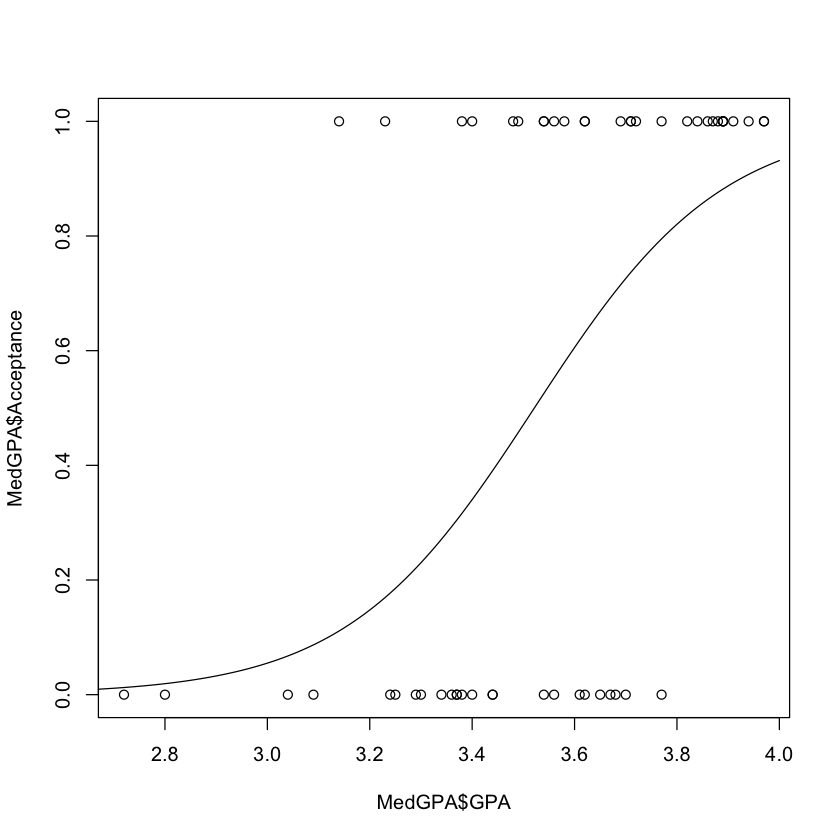

In [6]:
# Solution
plot(MedGPA$GPA, MedGPA$Acceptance)
fit.xx <- seq(from=2.6, to=4.0, by=0.01)  # Create x values for fitted model plot 
fit.yy <- predict(fit, newdata = data.frame(GPA = fit.xx), type = "response")  # Create y values for fitted model plot
lines(fit.xx, fit.yy)